In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno.missingno as msno
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
datetime.now().year

2021

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

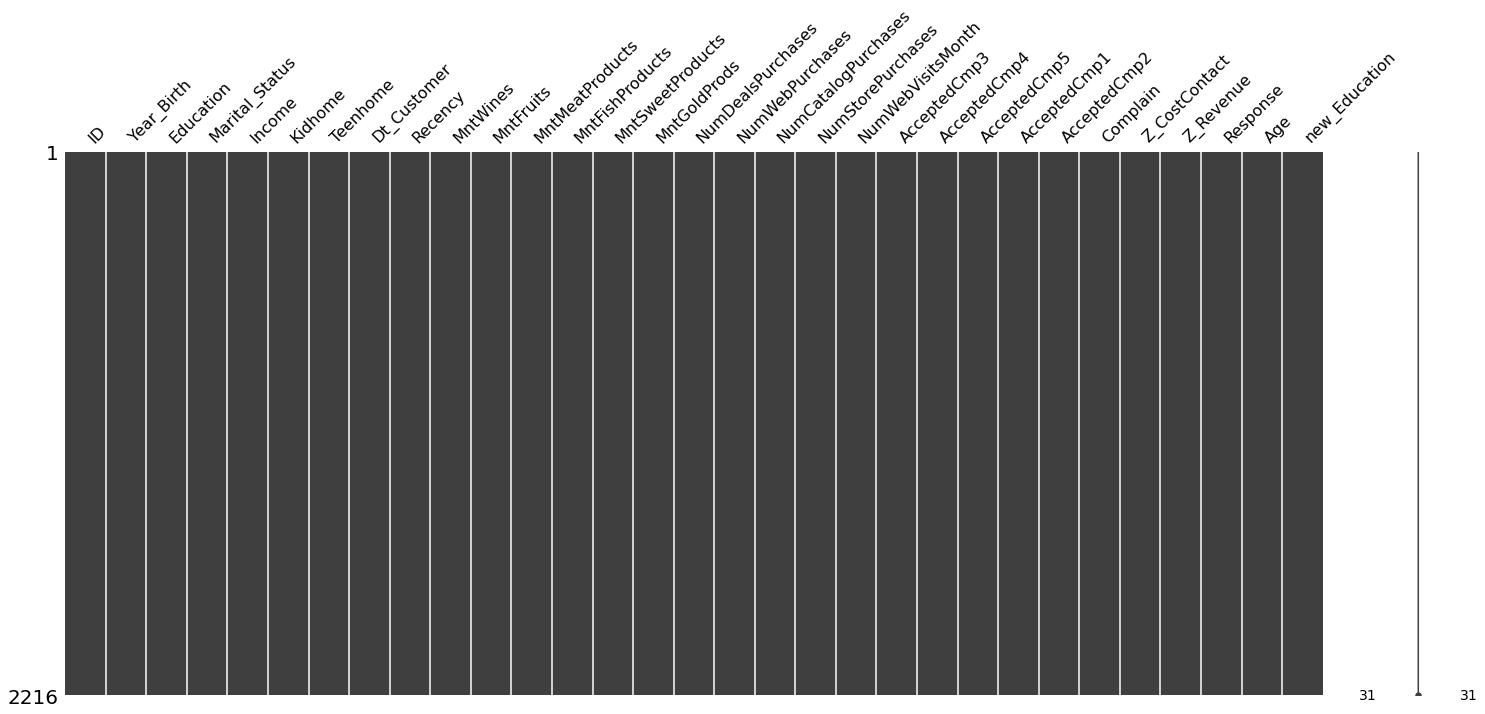

In [35]:
msno.matrix(df)
plt.show()

In [7]:
df[df.isna().any(axis=1)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0


In [8]:
df.dropna(axis=0, inplace=True)

### Calculate the customers' age

In [9]:
datetime.now().year

2021

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df['Age'] = datetime.now().year - df.Year_Birth

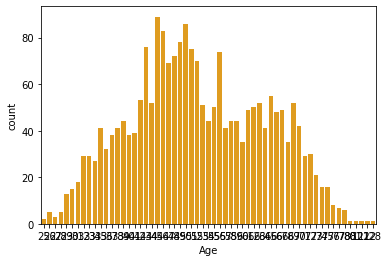

In [15]:
sns.countplot(x="Age", data=df, color='orange')

plt.show()

In [16]:
df.Age.describe()

count    2216.000000
mean       52.179603
std        11.985554
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

### Clean up Education column

In [18]:
df.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [21]:
def edu(x):
    education = {'Basic':'Undergraduate',
                 '2n Cycle':'Undergraduate',
                 'Graduation':'Postgraduate',
                 'Master':'Postgraduate',
                 'PhD':'Postgraduate'}
    return education[x]

In [28]:
df['new_Education'] = df.Education.apply(edu)

In [34]:
df[['Education', 'new_Education']].head()

,Education,new_Education
0,Graduation,Postgraduate
1,Graduation,Postgraduate
2,Graduation,Postgraduate
3,Graduation,Postgraduate
4,PhD,Postgraduate


### Clean up Marital Status column

In [36]:
df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [56]:
df[df['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,new_Education
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,0,0,0,0,0,3,11,0,48,Postgraduate
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,0,0,0,0,0,3,11,1,48,Postgraduate


In [38]:
df[df['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,new_Education
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,0,1,1,0,0,3,11,1,28,Postgraduate
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,...,0,0,0,0,0,3,11,0,64,Postgraduate


Dropping the "YOLO" and "Absurd" marital status because we are not sure if that means "Single" or "In a relationship". We do not want to make assumptions that may be incorrect.

In [58]:
df = df[df.Marital_Status != 'YOLO']
df = df[df.Marital_Status != 'Absurd']

In [58]:
temp_df = df[['Education', 'Marital_Status', 'Income']]

temp_df.head()
# pd.plotting.scatter_matrix(df)
# plt.show()

,Education,Marital_Status,Income
0,Graduation,Single,58138.0
1,Graduation,Single,46344.0
2,Graduation,Together,71613.0
3,Graduation,Together,26646.0
4,PhD,Married,58293.0


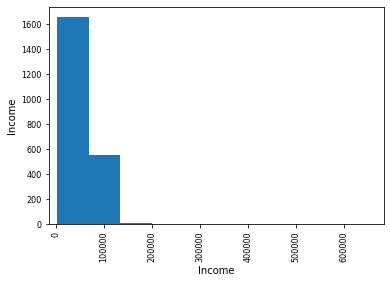

In [57]:
pd.plotting.scatter_matrix(temp_df)
plt.show()

In [54]:
df.shape, new.shape

((2216, 31), (2034, 30))